In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [6]:
df= pd.read_csv("/Users/samruddhikale/Desktop/Fey/mcdonalds.csv")

In [7]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [9]:

MD_x = df.iloc[:, 0:11].eq('Yes').astype(int)
print(MD_x.mean().round(2))


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [10]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
# Extracting relevant information
result_summary = pd.DataFrame({'PC': [f'PC{i+1}' for i in range(pca.n_components_)],'Standard deviation':
pca.explained_variance_**0.5,
'Proportion of Variance': pca.explained_variance_ratio_, 'Cumulative Proportion': pca.explained_variance_ratio_.cumsum()
})

# Set the precision for better formatting
pd.set_option("display.precision", 4)

# Display the result summary
print(result_summary)

      PC  Standard deviation  Proportion of Variance  Cumulative Proportion
0    PC1              0.7570                  0.2994                 0.2994
1    PC2              0.6075                  0.1928                 0.4922
2    PC3              0.5046                  0.1330                 0.6253
3    PC4              0.3988                  0.0831                 0.7084
4    PC5              0.3374                  0.0595                 0.7679
5    PC6              0.3103                  0.0503                 0.8182
6    PC7              0.2897                  0.0438                 0.8620
7    PC8              0.2751                  0.0395                 0.9016
8    PC9              0.2653                  0.0368                 0.9383
9   PC10              0.2488                  0.0324                 0.9707
10  PC11              0.2369                  0.0293                 1.0000


In [11]:
standard_deviations = pca.explained_variance_**0.5
print("Standard deviations (1, .., p=11):")
print(np.round(standard_deviations, 1))

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [15]:
# printing the rotation matrix:
column_names = MD_x.columns
rotation_matrix = pd.DataFrame(np.round(pca.components_.T, 3),columns=column_names)
print(f"Rotation (n x k) = ({MD_x.shape[1]} x {MD_x.shape[1]}):") 
print(rotation_matrix)

Rotation (n x k) = (11 x 11):
    yummy  convenient  spicy  fattening  greasy   fast  cheap  tasty  \
0  -0.477       0.364 -0.304      0.055  -0.308  0.171 -0.281  0.013   
1  -0.155       0.016 -0.063     -0.142   0.278 -0.348 -0.060 -0.113   
2  -0.006       0.019 -0.037      0.198   0.071 -0.355  0.708  0.376   
3   0.116      -0.034 -0.322     -0.354  -0.073 -0.407 -0.386  0.590   
4   0.304      -0.064 -0.802      0.254   0.361  0.209  0.036 -0.138   
5  -0.108      -0.087 -0.065     -0.097   0.108 -0.595 -0.087 -0.628   
6  -0.337      -0.611 -0.149      0.119  -0.129 -0.103 -0.040  0.140   
7  -0.472       0.307 -0.287     -0.003  -0.211 -0.077  0.360 -0.073   
8   0.329       0.601  0.024      0.068  -0.003 -0.261 -0.068  0.030   
9  -0.214       0.077  0.192      0.763   0.288 -0.178 -0.350  0.176   
10  0.375      -0.140 -0.089      0.370  -0.729 -0.211 -0.027 -0.167   

    expensive  healthy  disgusting  
0       0.572   -0.110       0.045  
1      -0.018   -0.666      -0.

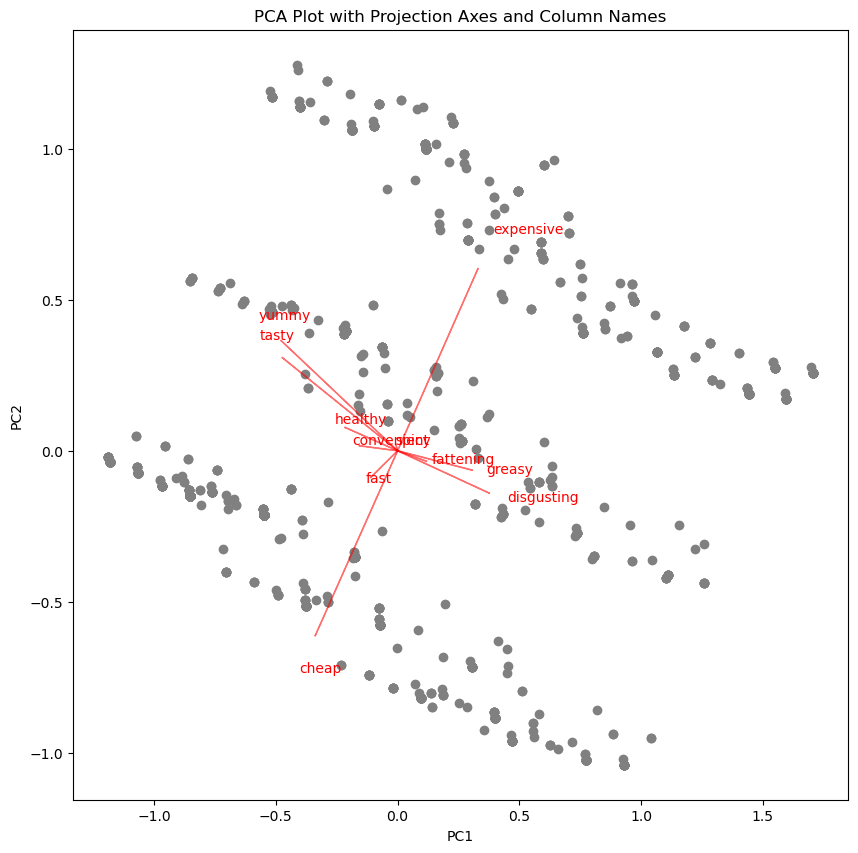

In [31]:
plt.figure(figsize=(10, 10))
# Plotting the data points in the reduced dimensional space 
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
# Adding projection axes and annotating with column names
for i in range(MD_pca.shape[1]):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='red',alpha=0.5)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, MD_x.columns[i], color='red')
    
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot with Projection Axes and Column Names')
plt.show()

In [39]:
pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 2.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [41]:
# Extracting segments using k-means
from sklearn.cluster  import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline
from sklearn_extra.cluster import KMedoids
# Set a seed for reproducibility
np.random.seed(1234)
cluster_range = [2, 8]
# Performing k-means clustering with ten random restarts
results = {}
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=1234)
    pipeline = make_pipeline(StandardScaler(), kmeans)
    labels = pipeline.fit_predict(MD_x)
    results[num_clusters] = labels
# Relabel segments to be consistent across segmentations
for num_clusters in cluster_range:
    unique_labels = np.unique(results[num_clusters])
    relabeling_dict = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}
    results[num_clusters] = np.vectorize(relabeling_dict.get)(results[num_clusters])

In [42]:

labels_2_clusters = results[2]
print("Labels for 2 clusters:", labels_2_clusters)
# Access the results for 8 clusters
labels_8_clusters = results[8]
print("Labels for 8 clusters:", labels_8_clusters)

Labels for 2 clusters: [1 0 0 ... 0 0 1]
Labels for 8 clusters: [7 0 6 ... 3 5 2]


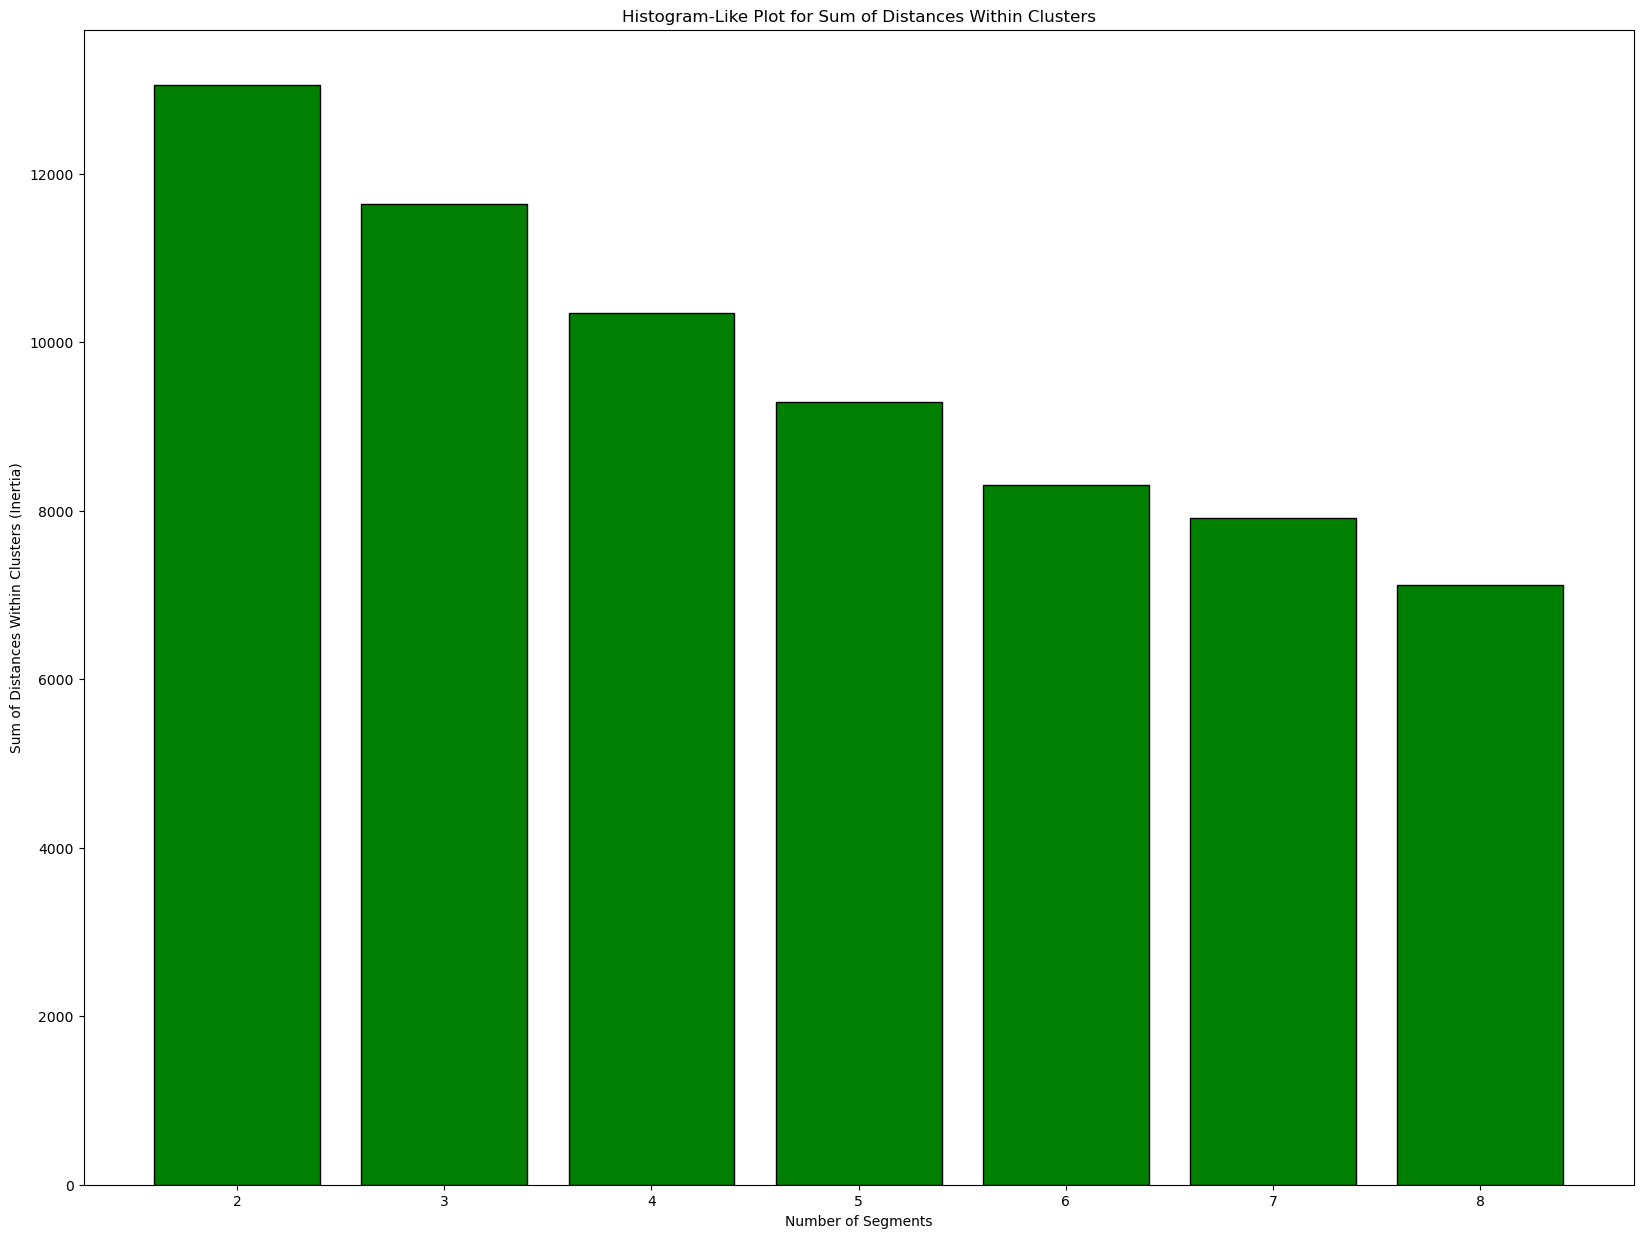

In [43]:
# Specify the range of cluster numbers
cluster_range = range(2, 9)
# Compute the inertia (sum of distances within clusters) for each number of␣ ↪clusters
inertia_values = []
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=1234)
    pipeline = make_pipeline(StandardScaler(), kmeans)
    pipeline.fit(MD_x)
    inertia_values.append(pipeline.named_steps['kmeans'].inertia_)
# Plotting the histogram-like plot
plt.bar(cluster_range, inertia_values, color='green', edgecolor='black')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Distances Within Clusters (Inertia)')
plt.title('Histogram-Like Plot for Sum of Distances Within Clusters')
plt.show()